<a href="https://colab.research.google.com/github/dnevo/Practicum/blob/master/S03_EDA_%E2%80%93_correlate_price_and_apartments_features_at_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:Green">Project Review</span>

Hello, I am Dmitry. I occassionaly review students' projects as a tutor. I am happy this is your second project, that is an indicator you probably find our program useful. You can find my comments in <span style="color:Green">green</span> in separate Markdown cells throughout your project (when appropriate).

---

<span style="color:Green">

**2020-02-25 DD**

The first review. Accepted.

</span>

# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [85]:
import pandas as pd
pd.options.display.max_columns=200
pd.options.display.float_format = '{:20,.2f}'.format
sales_ads = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/real_estate_data_us.csv',delimiter='\t')
sales_ads.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,nan,"260,000.00",3,25.00,51.00,108.00,nan,2.70,16.00,8,20,NaN,False,False,Saint Petersburg,"18,863.00","16,028.00",482.00,1.00,755.00,2.00
1,2018-12-04T00:00:00,81.00,"67,000.00",1,11.00,18.60,40.40,2.00,nan,11.00,1,7,NaN,False,False,Shushary village,"12,817.00","18,603.00",nan,0.00,nan,0.00
2,2015-08-20T00:00:00,558.00,"103,920.00",2,8.30,34.30,56.00,0.00,nan,5.00,4,10,NaN,False,False,Saint Petersburg,"21,741.00","13,933.00",90.00,1.00,574.00,2.00
3,2015-07-24T00:00:00,424.00,"1,298,000.00",3,nan,nan,159.00,0.00,nan,14.00,9,0,NaN,False,False,Saint Petersburg,"28,098.00","6,800.00",84.00,2.00,234.00,3.00
4,2018-06-19T00:00:00,121.00,"200,000.00",2,41.00,32.00,100.00,nan,3.03,14.00,13,2,NaN,False,False,Saint Petersburg,"31,856.00","8,098.00",112.00,2.00,48.00,1.00


### Conclusion

In the first attemp, it could be noticed that a TAB delimiter was used (\t) - in order to handle it, the read_csv method was modified to include handling of.
In addition - missing values (NaN) can be immediately noticed - this will be handled in the data preprocessing section.

<span style="color:Green">

**2020-02-25 DD**

Good observation of the tab delimiter and the NaN values (that's lucky to get some in the first five rows as in not missing them. But how can you summarize the number of NaN values per each column for all rows to be sure of the whole picture? pandas provides at least one quite convinient method for that.
    
Ah, well, you have provided an answer for that below. I have been too quick at formulating that question. ))

</span>

### Step 2. Data preprocessing

As can see below, using the .info() method, the following parameters contain missing data:
- ceiling_height
- floors_total
- living_area
- kitchen_area
- balconies - almost half of data is missing
- locality_name
- airport_dist
- city_center_dist
- parks_within_3000
- park_dist - most of data is missing
- ponds_within_3000
- pond_dist - most of data is missing
- days_listed

In [86]:
print(sales_ads.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

In [87]:
sales_ads.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,"20,518.00","23,699.00","23,699.00","21,421.00","21,796.00","23,699.00","12,180.00","14,504.00","23,613.00","23,699.00","23,699.00","18,157.00","18,180.00","8,079.00","18,181.00","9,110.00","18,181.00"
mean,180.89,"130,830.98",2.07,10.57,34.46,60.35,1.15,2.77,10.67,5.89,9.86,"28,793.67","14,191.28",490.80,0.61,517.98,0.77
std,219.73,"217,740.27",1.08,5.91,22.03,35.65,1.07,1.26,6.60,4.89,5.68,"12,630.88","8,608.39",342.32,0.80,277.72,0.94
min,1.00,244.00,0.00,1.30,2.00,12.00,0.00,1.00,1.00,1.00,0.00,0.00,181.00,1.00,0.00,13.00,0.00
25%,45.00,"68,000.00",1.00,7.00,18.60,40.00,0.00,2.52,5.00,2.00,6.00,"18,585.00","9,238.00",288.00,0.00,294.00,0.00
50%,95.00,"93,000.00",2.00,9.10,30.00,52.00,1.00,2.65,9.00,4.00,9.00,"26,726.00","13,098.50",455.00,0.00,502.00,1.00
75%,232.00,"136,000.00",3.00,12.00,42.30,69.90,2.00,2.80,16.00,8.00,14.00,"37,273.00","16,293.00",612.00,1.00,729.00,1.00
max,"1,580.00","15,260,000.00",19.00,112.00,409.70,900.00,5.00,100.00,60.00,33.00,50.00,"84,869.00","65,968.00","3,190.00",3.00,"1,344.00",3.00


Handling NaN in `ceiling_height`: as it can be shown above the data contains considerale outliers (100m!!), therefore it will make sence to select the median (2.65) as the fill value.

In [88]:
sales_ads['ceiling_height'].fillna(2.65, inplace=True)

<span style="color:Green">

**2020-02-25 DD**

Indeed, the ceiling height of 2.65m looks to be reasonable. But there seem to be other cases of abnormal values in the column. What are they? Can you find them?

</span>

Handling NaN in `floors_total`: following results of describe() method, we can safely assume that `floors_total` = `floor`*2

In [89]:
sales_ads['floors_total'].fillna(sales_ads['floor']*2, inplace=True)

<span style="color:Green">

**2020-02-25 DD**

Hmm... I am afraid it won't work. An advertised object can be any floor in a building. It is hard to tell the height of buildings (in floors) looking at just one floor of it (like through a narrow slot). I might be mistaken though, can you probably provide your thoughts here on why this assumption (floor*2) can be valid?

</span>

Handling NaN in `living_area`: we will use mean of ratio `living_area` to `total_area` (34.46/60.35) as fill value.

In [90]:
sales_ads['living_area'].fillna((34.46/60.35)*sales_ads['total_area'], inplace=True)

<span style="color:Green">

**2020-02-25 DD**

Ok, that looks interesting (and appropritate). But I'd wonder of this ratio source? Did you calculate it from the data?

</span>

Handling NaN in `kitchen_area`: we will use mean of ratio `kitchen_area` to `total_area` (10.57/60.35) as fill value.

In [91]:
sales_ads['kitchen_area'].fillna((10.57/60.35)*sales_ads['total_area'], inplace=True)

Handling NaN in `balcony` - assuming it can be replaced by zero (if user did not enter number of balconies, then he has no balconies).

In [92]:
sales_ads['balconies'].value_counts()

1.00    4195
0.00    3758
2.00    3659
5.00     304
4.00     183
3.00      81
Name: balconies, dtype: int64

In [93]:
sales_ads['balconies'].fillna(0,inplace=True)

Handling NaN in `locality_name`:

In [94]:
sales_ads['locality_name'].value_counts()
# TO BE HANDLED AFTER YANDEX WILL FIX THE NAMES

Saint Petersburg        15721
Murino village            556
Shushary village          440
Vsevolozhsk               398
Pushkin                   369
                        ...  
Chudskoy Bor village        1
village Ryabovo             1
Shpankovo village           1
Pizhma village              1
Tikhkovitsy village         1
Name: locality_name, Length: 326, dtype: int64

<span style="color:Green">

**2020-02-25 DD**

I am sorry that the translation is still missed. Meanwhile, you can try to perceive those names as quite absract names (e.g. like just numbers). The only meaningful name required in the project I believe is 'Санкт-Петербург' (Saint Petersburg).

</span>

Handling NaN in `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`: we will use median as fill value to avoid bias by outliers.

In [95]:
sales_ads['airport_dist'].fillna(26726.0,inplace=True)
sales_ads['city_center_dist'].fillna(13098.5,inplace=True)
sales_ads['parks_within_3000'].fillna(0.0,inplace=True)
sales_ads['park_dist'].fillna(455.0,inplace=True)
sales_ads['ponds_within_3000'].fillna(1.0,inplace=True)
sales_ads['pond_dist'].fillna(502.0,inplace=True)

Handling NaN in `days_listed`: it can be firmly assumed that NaN stand for properties not yet being sold. We will give it value of zero in order to be able to see it in our analysis.

In [96]:
sales_ads['days_listed'].fillna(0.0,inplace=True)

<span style="color:Green">

**2020-02-25 DD**

Ok. Alternatively, it can be left as it is i.e. with the NaN values. If it is not possible to 'guess' data in a reasonable way, NaN can be left in place as indicators of missing data indeed in further analysis.

</span>

Convert `date_posted` to `datatime` obect type. This is required as in next sections we will make analysis based on day of the week, month and year.

In [97]:
#2019-03-07T00:00:00
sales_ads['date_posted'] = pd.to_datetime(sales_ads['date_posted'], format='%Y-%m-%dT%H:%M:%S')

### Conclusion of Step 2
- missing data: some of the fields were almost all missing (ex. `is_apartment`)
- distribution: some of the parameters have uneaven distribution making the mean() unreliable - therefore median() was mostly used as averagfe.
- outliers: data contain considerable amount of outliers - some are natural (ex. price and area for luxary apartments) and smome due to mistakes (ex. celing height of 100m).
- type conversion was required - ex: `date_posted` was converted to datetime() for calculations purpose.

### Step 3. Make calculations and add them to the table

Add `price_per_sqm` column

In [98]:
sales_ads['price_per_sqm'] = sales_ads['last_price'] / sales_ads['total_area']

Add `weekday_posted`, `month_posted` and `year_posted` columns (based on `date_posted`)

In [99]:
sales_ads['weekday_posted'] = sales_ads['date_posted'].dt.weekday
sales_ads['month_posted'] = sales_ads['date_posted'].dt.month
sales_ads['year_posted'] = sales_ads['date_posted'].dt.year

Add `floor_category` column with values First, Last and Other - based on `floor`

In [100]:
def floor_category(row):
    if row['floor'] == 1.0:
        return 'First'
    elif row['floor'] < row['floors_total']:
        return 'Other'
    else:
        return 'Last'
sales_ads['floor_category'] = sales_ads.apply(floor_category, axis=1)

Add `living_space_to_tot_area` and `kitchen_to_tot_area` columns

In [101]:
sales_ads['living_space_to_tot_area'] = sales_ads['living_area'] / sales_ads['total_area']
sales_ads['kitchen_to_tot_area'] = sales_ads['kitchen_area'] / sales_ads['total_area']

<span style="color:Green">

**2020-02-25 DD**

Good.

</span>

### Conclusion of Step 3
- price_per_sqm - been added - as this is an important indicator
- floor_category was added: first floor and top floors are regarding differently from the rest of the floors.
- for area there are 3 parameters: total, living and kitchen - it might be important to see the ratio between them

### Step 4. Conduct exploratory data analysis and follow the instructions below:

`total_area` - as can be seen in the general and 'zoomed' histograms, the majority of the properties are in the range of 30 to 80 sqm and the distribution looks quite nomal (bell shaped).

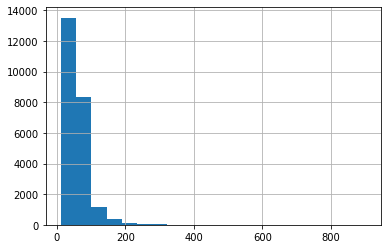

In [102]:
sales_ads['total_area'].hist(bins=20);

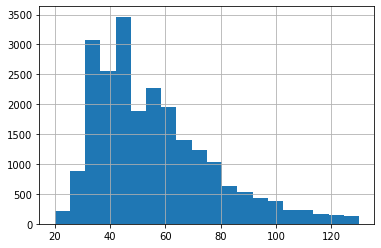

In [103]:
sales_ads['total_area'].hist(bins=20, range=(20,130));

<span style="color:Green">

**2020-02-25 DD**

Thank you for 'zooming' in the the most populated interval. But it does not look normal distribution because it has a long right tail.

</span>

`last_price` - It can be clearly noticed that the distribution is similar to the `total_area` (which should not be a surprise...)

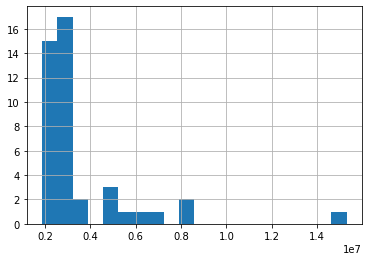

In [104]:
sales_ads['last_price'].hist(bins=20, range=(1870000.0,15300000.0));

`rooms` - as can noticed distribution is normal and most of the properties are between 1 to 4 rooms. A clear anomality is that there are properities with `rooms` set to zero - this should be definitely handled.

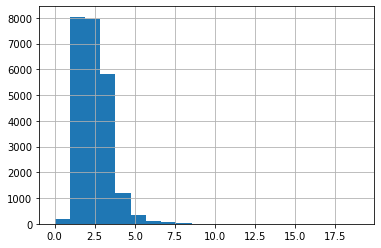

In [105]:
sales_ads['bedrooms'].hist(bins=20);

<span style="color:Green">

**2020-02-25 DD**

Ok. BTW, given the integer nature of the number of rooms, what other way of assessing its distribution (rather than with the histogram) would be more approproate. I'd even say natural.

</span>

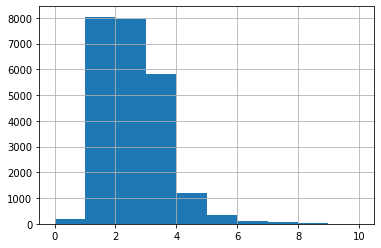

In [106]:
sales_ads['bedrooms'].hist(bins=10,range=(0,10));

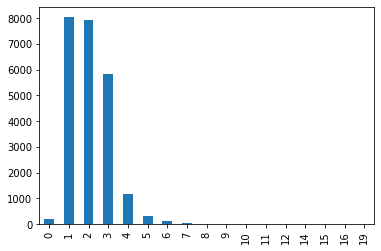

In [107]:
sales_ads['bedrooms'].value_counts().sort_index().plot.bar();

`ceiling_height` - we can immediately notice that data include anomalies (ex height = 100m!). In order to have a meaningful histogram, we define a range to include the main ballpark which shows most values reside between 2.5 to 3.3m.

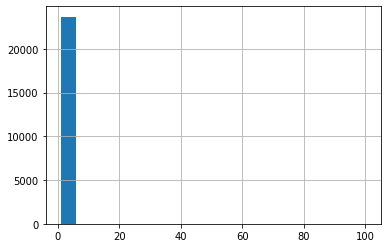

In [108]:
sales_ads['ceiling_height'].hist(bins=20);

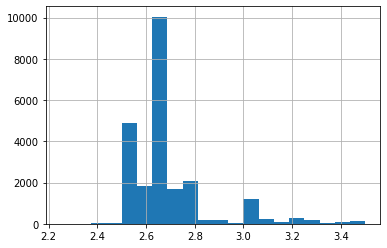

In [109]:
sales_ads['ceiling_height'].hist(bins=20, range=(2.25,3.5));

`days_listed` - we can see an interesting peaks of 880 adds that were listed exactly 45 days (880 ocurances), 60 days(580) and 90 days (205) - maybe there is a condition in the advertisement causing the ads to be dropped due to no-payment?
Other than that, we can notice that the distribution is a descending curve - this can imply a high demand for properties in the area.

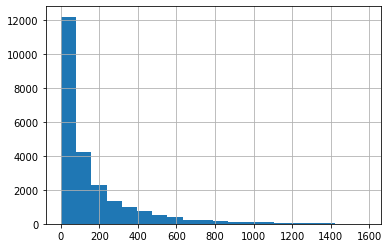

In [110]:
sales_ads['days_listed'].hist(bins=20);

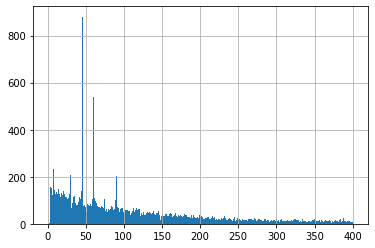

In [111]:
sales_ads['days_listed'].hist(bins=400,range=(1,400));

<span style="color:Green">

**2020-02-25 DD**

I agree the peaks look interesting and your explanation is very suitable here. Though, I'd additionally check those intervals ('zooming in' again? or just counting the number of cases within certain intervals). Histograms can be misleading sometimes as they just approximate distributions, they estimate it with an error.

</span>

We can notice a huge difference between the mean and median values - this is of course due to form of the distribtion (slow descent curve) - therefore as an average, median (74 days) should be taken.

In [112]:
print('median=',sales_ads['days_listed'].median(), ', mean=', sales_ads['days_listed'].mean())

median= 74.0 , mean= 156.60884425503187


### Handling Outliers:
- `last_price` - handling the 1% and 99% percentiles
- `total_area` - handling the 1% and 99% percentiles
- `bedrooms` - handling the 99% percentile (the lower percentile is ok)
- `ceiling_height` - handling the 1% and 99% percentiles
- `floors_total` - handling the 1% and 99% percentiles
- `living_area` - handling the 1% and 99% percentiles
- `floor` - handling the 99% percentile (the lower percentile is ok)
- `kitchen_area` - handling the 1% and 99% percentiles
- `days_listed` - handling the 99% percentile (the lower percentile is ok)

In [115]:
last_price0 = sales_ads['last_price'].quantile(0.01)
last_price1 = sales_ads['last_price'].quantile(0.99)
total_area0 = sales_ads['total_area'].quantile(0.01)
total_area1 = sales_ads['total_area'].quantile(0.99)
rooms1 = sales_ads['bedrooms'].quantile(0.99)
ceiling_height0 = sales_ads['ceiling_height'].quantile(0.01)
ceiling_height1 = sales_ads['ceiling_height'].quantile(0.99)
floors_total0 = sales_ads['floors_total'].quantile(0.01)
floors_total1 = sales_ads['floors_total'].quantile(0.99)
living_area0 = sales_ads['living_area'].quantile(0.01)
living_area1 = sales_ads['living_area'].quantile(0.99)
floor1 = sales_ads['floor'].quantile(0.99)
kitchen_area0 = sales_ads['kitchen_area'].quantile(0.01)
kitchen_area1 = sales_ads['kitchen_area'].quantile(0.99)
days_listed1 = sales_ads['days_listed'].quantile(0.99)

In [117]:
sales_ads.query("@last_price0 < last_price < @last_price1", inplace=True)
sales_ads.query("@total_area0 < total_area < @total_area1", inplace=True)
sales_ads.query("bedrooms < @rooms1", inplace=True)
sales_ads.query(" @ceiling_height0 < ceiling_height < @ceiling_height1", inplace=True)
sales_ads.query("@floors_total0 < floors_total < @floors_total1", inplace=True)
sales_ads.query("@living_area0 < living_area < @living_area1", inplace=True)
#sales_ads.query("floor < @floor1", inplace=True)
sales_ads.query("@kitchen_area0 < kitchen_area < @kitchen_area1", inplace=True)
sales_ads.query("days_listed < @days_listed1", inplace=True)

<span style="color:Green">

**2020-02-25 DD**

Ok, though the code above reads a bit weird to me with that 'inplace' option (and you lose the original data btw which you might still need for additional analysis). I suggest something like that

```
sales_ads_filtered = sales.ads \
    .query("@last_price0 < last_price < @last_price1") \
    .query("@total_area0 < total_area < @total_area1") \
    ...
```

</span>

In [118]:
sales_ads.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_sqm,weekday_posted,month_posted,year_posted,living_space_to_tot_area,kitchen_to_tot_area
count,"14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00","14,190.00"
mean,146.99,"111,516.66",1.90,10.23,31.25,55.72,0.63,2.70,11.01,6.01,9.86,"27,971.57","14,036.70",471.48,0.46,511.42,0.81,"1,978.28",2.58,6.41,"2,017.34",0.55,0.19
std,185.82,"60,939.28",0.79,3.81,12.76,19.11,0.98,0.14,5.67,4.51,5.64,"10,779.53","7,222.72",211.04,0.72,173.53,0.82,642.44,1.79,3.48,1.01,0.09,0.06
min,0.00,"28,400.00",0.00,5.01,14.10,28.50,0.00,2.55,4.00,1.00,0.00,0.00,287.00,1.00,0.00,13.00,0.00,384.62,0.00,1.00,"2,014.00",0.18,0.06
25%,25.00,"72,000.00",1.00,7.76,19.00,40.90,0.00,2.65,5.00,3.00,6.00,"20,151.25","11,096.00",455.00,0.00,502.00,0.00,"1,586.68",1.00,3.00,"2,017.00",0.49,0.15
50%,74.00,"95,453.50",2.00,9.60,30.00,52.00,0.00,2.65,9.00,5.00,10.00,"26,726.00","13,098.50",455.00,0.00,502.00,1.00,"1,917.45",3.00,6.00,"2,017.00",0.57,0.18
75%,193.00,"131,980.00",3.00,11.89,40.00,67.00,1.00,2.70,16.00,8.00,14.00,"34,213.75","15,186.00",455.00,1.00,502.00,1.00,"2,290.27",4.00,10.00,"2,018.00",0.61,0.23
max,"1,045.00","474,336.00",3.00,31.20,82.80,141.00,5.00,3.39,24.00,24.00,50.00,"73,391.00","61,495.00","3,190.00",3.00,"1,344.00",3.00,"7,741.94",6.00,12.00,"2,019.00",0.97,0.79


In [119]:
sales1 = sales_ads[['last_price','total_area','living_area','kitchen_area']]
sales1.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.74,0.62,0.56
total_area,0.74,1.00,0.92,0.55
living_area,0.62,0.92,1.00,0.29
kitchen_area,0.56,0.55,0.29,1.00


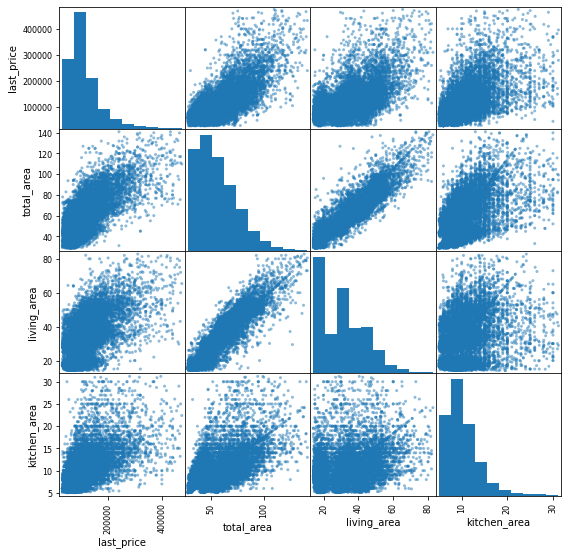

In [120]:
pd.plotting.scatter_matrix(sales1, figsize=(9, 9));

Influence on Apartment's price
<br>As expected the highest factor is the `total_area` (0.77). 
<br>Obviously it is followed by `living_area` (0.67) and `kitcken area` (0.58).
<br>Please note the negative correlation of `cityCenters_nearest` (-0.29).
<br>In addition, `rooms`: 0.47

In [121]:
sales_ads.corr()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,is_studio,is_open_plan,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_sqm,weekday_posted,month_posted,year_posted,living_space_to_tot_area,kitchen_to_tot_area
days_listed,1.00,0.03,0.04,0.04,0.05,0.06,-0.02,0.03,-0.03,-0.03,-0.05,-0.01,-0.01,-0.01,-0.03,0.02,0.04,-0.03,0.03,-0.02,-0.02,0.01,-0.58,-0.01,-0.01
last_price,0.03,1.00,0.43,0.56,0.62,0.74,0.05,0.36,0.10,0.08,0.14,-0.02,-0.02,0.02,-0.28,0.09,0.26,-0.05,0.13,0.72,-0.01,0.00,0.03,0.03,-0.14
bedrooms,0.04,0.43,1.00,0.16,0.87,0.78,0.01,0.10,-0.20,-0.14,0.08,-0.11,-0.05,-0.02,-0.07,-0.01,0.08,-0.00,0.03,-0.12,-0.00,0.01,-0.03,0.58,-0.64
kitchen_area,0.04,0.56,0.16,1.00,0.29,0.55,0.08,0.24,0.23,0.15,0.07,-0.05,-0.03,0.03,-0.11,0.06,0.04,-0.03,0.11,0.29,-0.01,0.02,-0.00,-0.38,0.50
living_area,0.05,0.62,0.87,0.29,1.00,0.92,0.02,0.22,-0.14,-0.10,0.09,-0.03,-0.02,-0.02,-0.12,0.01,0.13,-0.01,0.07,0.01,-0.01,0.01,-0.03,0.59,-0.60
total_area,0.06,0.74,0.78,0.55,0.92,1.00,0.06,0.27,-0.02,-0.02,0.10,-0.05,-0.03,0.01,-0.13,0.04,0.11,-0.03,0.10,0.11,-0.01,0.01,-0.03,0.24,-0.41
balconies,-0.02,0.05,0.01,0.08,0.02,0.06,1.00,-0.02,0.16,0.16,0.05,0.03,0.02,0.03,0.05,0.01,-0.07,0.02,-0.02,0.03,0.01,0.02,0.01,-0.07,0.04
ceiling_height,0.03,0.36,0.10,0.24,0.22,0.27,-0.02,1.00,-0.10,-0.05,0.03,0.02,-0.00,-0.03,-0.22,-0.02,0.21,-0.05,0.12,0.29,-0.03,-0.00,0.03,-0.01,0.01
floors_total,-0.03,0.10,-0.20,0.23,-0.14,-0.02,0.16,-0.10,1.00,0.63,0.03,0.03,0.01,0.07,-0.01,0.01,-0.15,0.02,-0.08,0.21,0.00,0.01,0.03,-0.34,0.31
floor,-0.03,0.08,-0.14,0.15,-0.10,-0.02,0.16,-0.05,0.63,1.00,0.05,0.00,-0.00,0.04,-0.00,0.02,-0.10,0.01,-0.05,0.16,0.01,0.02,0.03,-0.23,0.21


<span style="color:Green">

**2020-02-25 DD**

That's a lot of figures! I am impressed you have found 'speaking' numbers in that, the conclusions look correct. However, to made it clear I'd advise to build smaller correlation tables (use less variables) or use a formatting option to highlight figures (check the Pandas output formatting option, it is quite easy to do). It might help you to find more interesting correlations.

</span>

Influence of `floor_category` (top, bottom, other) on price: First floor is the cheapest (like in other places in the world). Last floor is a bit less expensive than middle floors.

In [122]:
sales_ads.groupby('floor_category')['last_price'].mean()

floor_category
First              92,280.27
Last              109,258.84
Other             114,543.49
Name: last_price, dtype: float64

Influence of weekday on price: no real influence - no surprise at all since it take time to close a sales deal...

In [123]:
sales_ads.groupby('weekday_posted')['last_price'].mean()

weekday_posted
0             111,910.11
1             112,145.90
2             111,922.51
3             112,615.25
4             109,624.86
5             110,827.33
6             110,763.15
Name: last_price, dtype: float64

Influence of month on prices: influence is quite marginal (6% diferences) - September is the top, while June is the bottom.

In [124]:
sales_ads.groupby('month_posted')['last_price'].mean()

month_posted
1              112,186.54
2              110,765.55
3              111,721.07
4              114,055.47
5              108,102.10
6              106,164.66
7              109,948.98
8              115,911.74
9              115,448.96
10             110,617.35
11             111,929.63
12             109,707.62
Name: last_price, dtype: float64

Influence of year on the prices: 2014 was a peak year. From then there was a decline till 2017 (worst year in this period). Afterwards there is a recovey that continues in 2019 - but still far from 2014..

In [125]:
sales_ads.groupby('year_posted')['last_price'].mean()

year_posted
2014             157,280.78
2015             117,450.94
2016             107,514.63
2017             108,150.86
2018             111,903.18
2019             121,880.95
Name: last_price, dtype: float64

<span style="color:Green">

**2020-02-25 DD**

2014-2015 were quite tough years in Russia indeed because of the rouble losing its buying power.

</span>

The 10 Municipalities with most ads:

In [126]:
top10 = list(sales_ads.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).index)
print(top10)
top10_ads = sales_ads[sales_ads['locality_name'].isin(top10)]

['Saint Petersburg', 'Murino village', 'Shushary village', 'Vsevolozhsk', 'Kudrovo village', 'Pushkin', 'Kolpino', 'Gatchina', 'Vyborg', 'Sestroretsk']


Impact of municipality on prices - it is not a surprise that there is impact: `Saint Petersburg` is the highest (127,437.02), which is about double from the lowest - `Vyborg` (64,895.59)

In [128]:
top10_ads.groupby('locality_name')['last_price'].mean().sort_values()

locality_name
Vyborg                        64,895.59
Gatchina                      72,506.71
Vsevolozhsk                   76,651.18
Kolpino                       77,710.85
Murino village                78,594.99
Shushary village              83,275.50
Kudrovo village               89,044.59
Pushkin                      118,844.73
Saint Petersburg             127,437.02
Sestroretsk                  127,823.77
Name: last_price, dtype: float64

In the graph below we can notice a drop in price on 7-8km - this defines pretty well the boundaries of city center.

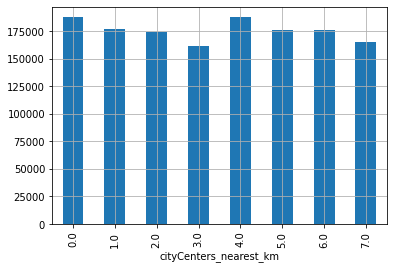

In [129]:
city_ads = sales_ads[sales_ads['locality_name'] == 'Saint Petersburg'].copy()
citycenter_ads = city_ads.query('city_center_dist <= 8000')
city_ads.loc[:,'cityCenters_nearest_km'] = (citycenter_ads.loc[:,'city_center_dist'] / 1000).astype('int')
price_per_distance = city_ads.groupby('cityCenters_nearest_km')['last_price'].mean()
price_per_distance.plot(kind='bar', grid=True);

<span style="color:Green">

**2020-02-25 DD**

I have added the variable citycenter_ads, it was missing. Hopefully, I correctly guessed its meaning.

</span>

Analyze apartments in city center

When comparing city center to the total ads we can note the following:
- price in city center is significantly  higher: 9.9M vs 5.9M
- price_per_sqm in city center also higher - 30% - 131K vs 99K
- total are is 25% bigger 76 sqm vs 58
- more rooms: 2.5 vs 2
- higher ceiling
- lower building 7.5 vs 11

In [130]:
citycenter_ads = city_ads[city_ads['cityCenters_nearest_km'] < 8][
    ['total_area','last_price','price_per_sqm','bedrooms','ceiling_height','floor','city_center_dist','days_listed',
     'date_posted','year_posted','floors_total']]
citycenter = citycenter_ads.mean()
citycenter

total_area                        67.45
last_price                   175,170.52
price_per_sqm                  2,609.84
bedrooms                           2.18
ceiling_height                     2.82
floor                              4.51
city_center_dist               4,980.32
days_listed                      180.95
year_posted                    2,017.23
floors_total                       7.86
dtype: float64

As can be noted below the main driver for the price is the area - this is very similar to result in total ads.

In [131]:
rest = sales_ads.loc[:,['total_area','last_price','price_per_sqm','bedrooms','ceiling_height','floor',
                        'city_center_dist','days_listed','date_posted','year_posted','floors_total']].mean()
citycenter_vs_rest = pd.concat([citycenter, rest], axis=1,sort=False)
citycenter_vs_rest.columns = ['city_center','rest']
citycenter_vs_rest

,city_center,rest
total_area,67.45,55.72
last_price,"175,170.52","111,516.66"
price_per_sqm,"2,609.84","1,978.28"
bedrooms,2.18,1.90
ceiling_height,2.82,2.70
floor,4.51,6.01
city_center_dist,"4,980.32","14,036.70"
days_listed,180.95,146.99
year_posted,"2,017.23","2,017.34"
floors_total,7.86,11.01


In [132]:
citycenter_ads.head()

,total_area,last_price,price_per_sqm,bedrooms,ceiling_height,floor,city_center_dist,days_listed,date_posted,year_posted,floors_total
61,74.00,"159,800.00","2,159.46",2,2.65,4,"4,288.00",609.00,2017-08-24,2017,4.00
63,118.00,"400,000.00","3,389.83",3,3.00,7,"4,800.00",37.00,2018-09-11,2018,9.00
111,40.00,"91,800.00","2,295.00",1,2.65,1,"6,175.00",31.00,2017-05-29,2017,6.00
137,85.10,"266,216.00","3,128.27",2,2.70,5,"4,263.00",340.00,2018-01-01,2018,10.00
141,32.60,"130,000.00","3,987.73",1,2.65,5,"5,448.00",0.00,2019-02-27,2019,5.00


In [133]:
citycenter_ads.corr()

,total_area,last_price,price_per_sqm,bedrooms,ceiling_height,floor,city_center_dist,days_listed,year_posted,floors_total
total_area,1.00,0.71,-0.05,0.68,0.12,0.07,-0.09,0.05,-0.03,0.02
last_price,0.71,1.00,0.64,0.33,0.08,0.18,-0.02,-0.02,0.07,0.18
price_per_sqm,-0.05,0.64,1.00,-0.27,0.00,0.18,0.04,-0.06,0.12,0.25
bedrooms,0.68,0.33,-0.27,1.00,0.14,-0.06,-0.11,0.01,0.01,-0.19
ceiling_height,0.12,0.08,0.00,0.14,1.00,-0.18,-0.18,-0.02,0.14,-0.29
floor,0.07,0.18,0.18,-0.06,-0.18,1.00,0.27,0.00,-0.04,0.65
city_center_dist,-0.09,-0.02,0.04,-0.11,-0.18,0.27,1.00,-0.03,0.01,0.40
days_listed,0.05,-0.02,-0.06,0.01,-0.02,0.00,-0.03,1.00,-0.62,0.02
year_posted,-0.03,0.07,0.12,0.01,0.14,-0.04,0.01,-0.62,1.00,-0.08
floors_total,0.02,0.18,0.25,-0.19,-0.29,0.65,0.40,0.02,-0.08,1.00


### Step 5. Overall conclusionType Markdown and LaTeX:  𝛼2 

- High variation can be noticed in the data - rare values and uneven distribution - removing outliers (1% on each side) was found to be helpful.
- Influence on price
  - apartments in city center have highest price (same also per sqm)
  - apartments in St. Petersburg have higher prices than other cities
  - generally, main influence on price is the area size.
  - Apartments in 1st floor are cheaper.
  - 2014 for the year with top prices. Bottom was in 2017 followed by slow recovery.

<span style="color:Green">

**2020-02-25 DD**

The conclusions look quite right. Removing outliers can make an analysis easier indeed though it needs to be with care so as to cut off interesting cases.
    
I'd suggest using more kind of graphs (line graphs, scatterplots, KDE plots (can be a bit more accurate than histograms)).
    
You may want to check my other comments in the project. I don't find them critical therefore the project is accepted.

</span>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square foot in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn